<a href="https://colab.research.google.com/github/sjosephnyc1987/public_ipython_Notebooks/blob/main/Intermarket_3_Everything_else.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermarket Analysis 3 
### Everything else (Stocks, Bonds vs Commodiites, US.Dollar)

The study of how different financial markets are connected to one another is known as intermarket analysis. 

Understanding how the various asset types interact is critical for at least two reasons. **First**, having this knowledge allows you to grasp how other financial markets influence the one you're most interested in. It's critical to understand how bonds and stocks interact, for example. Bond prices normally move in the opposite direction of stock prices, so if you're trading equities, keep an eye on bonds. In many circumstances, bond market turns occur before stock market turns. Bond yields and bond prices are negatively connected. As a result, decreasing bond yields (and rising bond prices) might be a warning sign for equities.

A **second** reason why understanding intermarket linkages is crucial is that it aids in the asset allocation process. There was a time not long ago when investors only had the option of investing in bonds, stocks, or cash. That constrained mindset was used to create asset allocation models. However, during the last decade, investing options have become much more diverse. The increasing availability of exchange-traded funds (ETFs) has made investing in commodities and currency markets as simple as purchasing a stock on a stock exchange. This opens up a world of possbilty in terms of diversifying risk.

In previous examples we looked at the following correllations of asset classes.

* Stocks vs Bonds [here](https://github.com/sjosephnyc1987/public_ipython_Notebooks/blob/main/Intermarket_2_Stocks_vs_Bonds.ipynb)

* Commodities vs US.Dollar [here](https://github.com/sjosephnyc1987/public_ipython_Notebooks/blob/main/Intermarket_1_USD_vs_Commodities.ipynb)

We even adjusted for Window size and determined that window size is not very relavant and so for the remaining asset classes, we'll compare them directly and plainly to each other over a span of 10 years.

**The correlations we are going to look at here are**

* Stocks vs Commodities
* Stocks vs US.Dollar
* Bonds vs Commodities
* Bonds vs US.Dollar.




In [ ]:

!pip install yfinance
#we begin by setting up imports in python.
import yfinance as yf  
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

we are going to use the DIA ETF as the proxy for stocks and the IEF (10 yr T-Bond) ETF as a proxy for Bonds

In [ ]:
asset1 = 'DIA'
asset1_label = 'DIA Stocks'

asset2 = 'IEF'
asset2_label = 'IEF 10-Year T-Bond'

asset3 = 'USCI'
asset3_label = 'USCI Commodities'

asset4 = 'UUP'
asset4_label = 'UUP US.Dollar'


portfolio1 = [asset1,asset2,asset3,asset4]

---
# Drawing a heatmap of the various assests in 10 year window 



In [ ]:
#window size  = 10 year
start_10year = datetime.datetime(2013,1,1)
end_10year =  datetime.datetime(2021,12,31)

Next we get stock prices from Yahoo over a span of 10 years

In [ ]:
portfolio_df_10year = yf.download(portfolio1,start=start_10year,end=end_10year)['Adj Close']


[*********************100%***********************]  4 of 4 completed


In [ ]:
# let's do a spotcheck to see if the data is any good.
print(portfolio_df_10year.head())

                   DIA        IEF       USCI        UUP
Date                                                   
2013-01-02  109.265862  91.237076  58.919998  21.144209
2013-01-03  109.151512  90.768105  58.529999  21.308945
2013-01-04  109.502792  90.810722  58.029999  21.308945
2013-01-07  109.053482  90.861916  58.169998  21.241112
2013-01-08  108.685966  91.083534  58.410000  21.270184


In [ ]:
#percentage change aka returns
portfolio_df_10year_pctChg = portfolio_df_10year.pct_change()

#spot check
print(portfolio_df_10year_pctChg.head())

                 DIA       IEF      USCI       UUP
Date                                              
2013-01-02       NaN       NaN       NaN       NaN
2013-01-03 -0.001047 -0.005140 -0.006619  0.007791
2013-01-04  0.003218  0.000470 -0.008543  0.000000
2013-01-07 -0.004103  0.000564  0.002413 -0.003183
2013-01-08 -0.003370  0.002439  0.004126  0.001369


In [ ]:
#next we create the corellation matrix od USCI vs UUP 10year
correlation_matrix_10yr = portfolio_df_10year_pctChg.corr()

And finally we create a heatmap of the correlation matrix to see what the relationship is like.

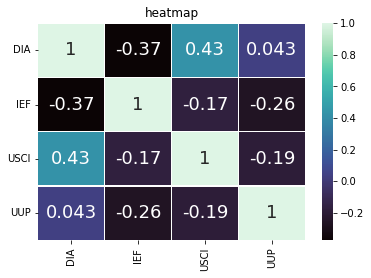

In [ ]:
sns.heatmap(data=correlation_matrix_10yr, annot=True, cmap="mako", linewidths=0.3, annot_kws={"size": 18}).set(title='heatmap')
# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

The correlations we note are as follows

* Stocks vs Commodities = 0.43
* Stocks vs US.Dollar =  0.043
* Bonds vs Commodities = -0.17
* Bonds vs US.Dollar = -0.26

We've already looked at Stocks vs Bonds (-0.37) [here](https://github.com/sjosephnyc1987/public_ipython_Notebooks/blob/main/Intermarket_2_Stocks_vs_Bonds.ipynb) and Commodities vs US.Dollar (0.43) [here](https://github.com/sjosephnyc1987/public_ipython_Notebooks/blob/main/Intermarket_1_USD_vs_Commodities.ipynb) and determined that their correlations are no better than what we have here.





---
To further examine, let's see what a chart looks like if we plot the 3 assets against each other 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


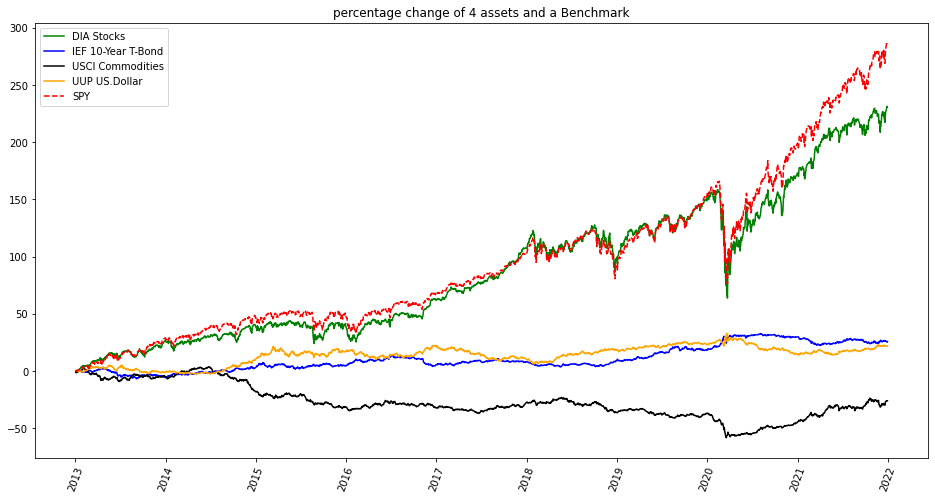

In [36]:
# #----------portfolio chart -----------
asset1_df = yf.download(asset1,start=start9_annual,end=end1_annual)['Adj Close']
asset2_df = yf.download(asset2,start=start9_annual,end=end1_annual)['Adj Close']
asset3_df = yf.download(asset3,start=start9_annual,end=end1_annual)['Adj Close']
asset4_df = yf.download(asset4,start=start9_annual,end=end1_annual)['Adj Close']

benchmark_df =yf.download('SPY',start=start9_annual,end=end1_annual)['Adj Close']

# -- returns ---
asset1_df_returns = asset1_df.pct_change()
asset2_df_returns = asset2_df.pct_change()
asset3_df_returns = asset3_df.pct_change()
asset4_df_returns = asset4_df.pct_change()
benchmark_df_returns = benchmark_df.pct_change()

# #calculate cumulative returns 
asset1_cume_chg = ((asset1_df_returns+1).cumprod()-1)*100
asset2_cume_chg = ((asset2_df_returns+1).cumprod()-1)*100
asset3_cume_chg = ((asset3_df_returns+1).cumprod()-1)*100
asset4_cume_chg = ((asset4_df_returns+1).cumprod()-1)*100
benchmark_cume_chg = ((benchmark_df_returns+1).cumprod()-1)*100



fig=plt.figure(figsize=(16,8))

#ploting asset chart
plt.plot(asset1_cume_chg, color='green',label = asset1_label)
plt.plot(asset2_cume_chg, color='blue',label = asset2_label)
plt.plot(asset3_cume_chg, color='black',label = asset3_label)
plt.plot(asset4_cume_chg, color='orange',label = asset4_label)


plt.plot(benchmark_cume_chg,'--',color='red' ,label = 'SPY')

plt.xticks(rotation=70)

plottitle = "percentage change of 4 assets and a Benchmark"
plt.title(plottitle)
plt.legend(loc='upper left')